In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    name:str
    age:int
    skills:list[str]
    result:str

def greeter_node(state:AgentState) -> AgentState:
    '''You are a greeter node'''
    state['result'] = f"{state['name']}, Welcome to the system!"
    return state

def ager_node(state:AgentState) -> AgentState:
    '''You are a ager node'''
    state['result'] = f"{state['result']} You are {state['age']} years old!"
    return state

def skiller_node(state:AgentState) -> AgentState:
    '''You are a skiller node'''
    skills = ', '.join(state['skills'])
    state['result'] = f"{state['result']} Your skills are {skills}"
    return state

graph = StateGraph(AgentState)

graph.add_node('greeter', greeter_node)
graph.set_entry_point('greeter')
graph.add_node('ager', ager_node)
graph.add_edge('greeter', 'ager')

graph.add_node('skiller', skiller_node)
graph.add_edge('ager', 'skiller')

graph.set_finish_point('skiller')

app = graph.compile()

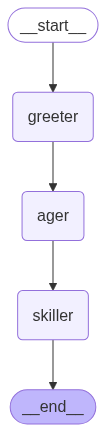

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({'name': "Ila", 'age': 2, 'skills': ['Crying', 'fuzzy', 'smiling', 'make veryone happy']})
print(result['result'])


Ila, Welcome to the system! You are 2 years old! Your skills are Crying, fuzzy, smiling, make veryone happy
